<a href="https://colab.research.google.com/github/Charleswr59/Independent-Project-DSPT2-/blob/main/Charles_Were_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PART 1: DESCRIPTIVE ANALYSIS**

# Defining the Question

#a) Specifying the Data Analytic Question

How well can we predict which individuals are most likely to have or use a bank account?

# b) Defining the Metric for Success


1. Describe (graphically) the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda
2. Explore the trends and patterns around financial inclusion in Kenya, Rwanda, Tanzania and Uganda. 
2. provide insights into some of the key demographic factors that might drive individuals’ financial outcomes.

# c) Understanding the context

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. Access to bank accounts has been regarded as an indicator of financial inclusion.This is the premise of this analyis, to investigate and provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda

# Reading the data

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_datareader as pdr 
df=pd.read_csv('https://bit.ly/VariableDefinitions')
df1=pd.read_csv('https://bit.ly/FinancialDataset')

In [246]:
df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [247]:
#checking the top 5 records of the data
df1.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [248]:
#check the bottom 5 records
df1.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [249]:
#checking the no of records in our dataset
df1.shape

(23524, 13)

In [250]:
#checking the datatypes of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [251]:
df1.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [252]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [253]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [254]:
# Total number of bank accounts by year vs country
df1['Has a Bank account'].value_counts()

No     20179
Yes     3309
Name: Has a Bank account, dtype: int64

# Cleaning the dataset

In [255]:
#checking fot Null values
df1.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [256]:
#our research is on predicting individuals likely to have and or use bank accounts 
#so we do not need null values in our data. thats why we are dropping the null values
df1.dropna(axis=0,inplace=True )

In [257]:
df1.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [258]:
df1=df1.astype({'Respondent Age':'int','household_size':'int'})

In [259]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23343 non-null  object
 1   year                    23343 non-null  int64 
 2   uniqueid                23343 non-null  object
 3   Has a Bank account      23343 non-null  object
 4   Type of Location        23343 non-null  object
 5   Cell Phone Access       23343 non-null  object
 6   household_size          23343 non-null  int64 
 7   Respondent Age          23343 non-null  int64 
 8   gender_of_respondent    23343 non-null  object
 9   The relathip with head  23343 non-null  object
 10  marital_status          23343 non-null  object
 11  Level of Educuation     23343 non-null  object
 12  Type of Job             23343 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB


In [260]:
#checking for duplicates
df1.duplicated().sum()
#our data has no duplicate values

0

In [261]:
#checking the unique years
df1['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [262]:
df1.drop(df1[df1['year']>2018].index,inplace = True)

In [263]:
#Confirming whether the unique years have been dropped
df1['year'].unique()

array([2018, 2016, 2017])

In [264]:
#checking if the Levels of Educuation are okay
df1['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [265]:

df1.drop(df1[df1['Level of Educuation']=='6'].index,inplace = True)

In [266]:
#confirming the Levels of Educuation are okay
df1['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [267]:
df1[df1['Respondent Age']>80].value_counts().sum()

335

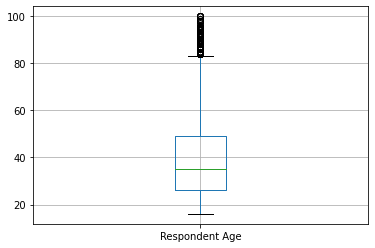

In [268]:
#checking for outliers in the Age column
df1.boxplot('Respondent Age')
#we do not drop the outliers because we will need to see if age is a factor that affects having bank accounts

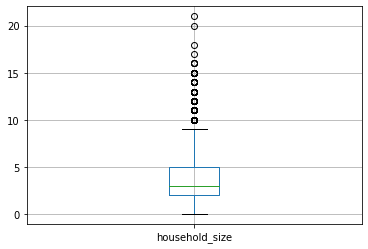

In [269]:
#checking for outliers
df1.boxplot('household_size')
#I dont have to drop the outliers in this case because some families can be large 
#and we would want to know if the household size affects having a bank account

# Exploratory Analysis

In [270]:
#checking for the measures of central tendency 
#i.e mean,median,mode, standard deviation,minimum and maximum values
#median = 50 percentile
df1.describe()

,year,household_size,Respondent Age
count,23313.000000,23313.000000,23313.000000
mean,2016.977952,3.688414,38.793549
std,0.849034,2.280842,16.510611
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [271]:
df1['Respondent Age'].median()

35.0

In [272]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23313 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23313 non-null  object
 1   year                    23313 non-null  int64 
 2   uniqueid                23313 non-null  object
 3   Has a Bank account      23313 non-null  object
 4   Type of Location        23313 non-null  object
 5   Cell Phone Access       23313 non-null  object
 6   household_size          23313 non-null  int64 
 7   Respondent Age          23313 non-null  int64 
 8   gender_of_respondent    23313 non-null  object
 9   The relathip with head  23313 non-null  object
 10  marital_status          23313 non-null  object
 11  Level of Educuation     23313 non-null  object
 12  Type of Job             23313 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB


In [273]:
df2=df1.drop(['year','Type of Location','household_size','Respondent Age','The relathip with head','marital_status','Level of Educuation','Type of Job'],axis=1)
Table=df2.groupby(by=['country','gender_of_respondent','Has a Bank account','Cell Phone Access']).agg('count')
Table
#The table shows the number of people by gender and country that have access to bank accounts

uniqueid
country  gender_of_respondent Has a Bank account Cell Phone Access          
Kenya    Female               No                 No                      778
                                                 Yes                    2002
                              Yes                No                       33
                                                 Yes                     667
         Male                 No                 No                      443
                                                 Yes                    1320
                              Yes                No                       29
                                                 Yes                     790
Rwanda   Female               No                 No                      995
                                                 Yes                    3723
                              Yes                No                        6
                                                 Yes                     435
         Male                 No                 No                      454
                                                 Yes                    2500
                              Yes                No                       13
                                                 Yes                     539
Tanzania Female               No                 No                     1778
                                                 Yes                    1714
                              Yes                No                        6
                                                 Yes                     233
         Male                 No                 No                      821
                                                 Yes                    1586
                              Yes                No                        7
                                                 Yes                     352
Uganda   Female               No                 No                      447
                                                 Yes                     834
                              Yes                No                        6
                                                 Yes                      91
         Male                 No                 No                      178
                                                 Yes                     449
                              Yes                No                        4
                                                 Yes                      80

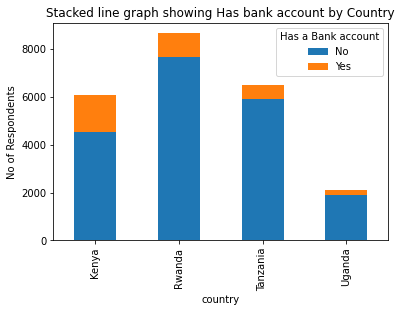

In [274]:
pd.crosstab(df1['country'], df1['Has a Bank account']).plot(kind='bar', stacked = True)
plt.title("Stacked line graph showing Has bank account by Country")
plt.ylabel("No of Respondents")
plt.show()

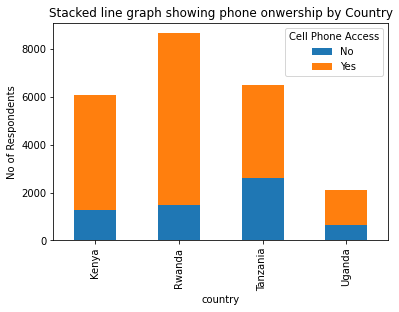

In [275]:
pd.crosstab(df1['country'], df1['Cell Phone Access']).plot(kind='bar', stacked=True)
plt.title("Stacked line graph showing phone onwership by Country")
plt.ylabel("No of Respondents")
plt.show()
# From the graph, we can see that Rwanda is leading in terms of phone ownership; followed by Kenya; then Tanzania and Uganda. 

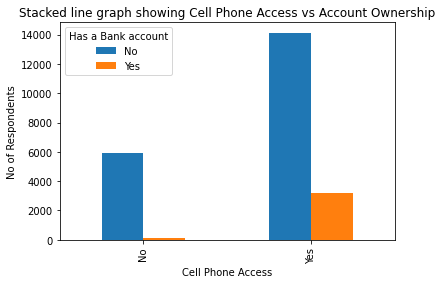

In [276]:
# Which between cell phone owners and non-owners, who is more likely to own a bank account? 
pd.crosstab(df1['Cell Phone Access'], df1['Has a Bank account']).plot(kind='bar')
plt.title("Stacked line graph showing Cell Phone Access vs Account Ownership")
plt.ylabel("No of Respondents")
plt.show()
# The graph shows that overally, those with phones significantly contribute to the the number of account owners. 

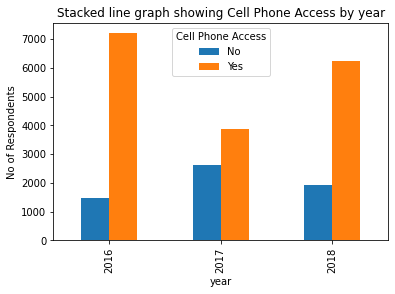

In [277]:
# How did Cell Phone Access perform over the years? 
pd.crosstab(df1['year'], df1['Cell Phone Access']).plot(kind='bar')
plt.title("Stacked line graph showing Cell Phone Access by year")
plt.ylabel("No of Respondents")
plt.show()
# Generally, phon access was highest in 2016, then dropped in 2017 before rising again in 2018. 
# This trend tends to coincide with the account ownership; pointing towards phone access as a facilitator for financial inclusion. 

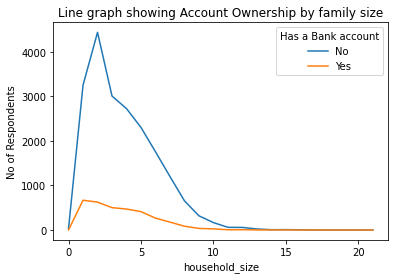

In [278]:
# How does financial inclusion compare among the family sizes?
pd.crosstab(df1['household_size'], df1['Has a Bank account']).plot(kind='line')
plt.title("Line graph showing Account Ownership by family size")
plt.ylabel("No of Respondents")
plt.show()
#Generally, as the household size grows, the ownership of bank accounts reduces. 
#Interestingly, comparing the two line graphs, the gap between account owners and non-account owners narrows. 


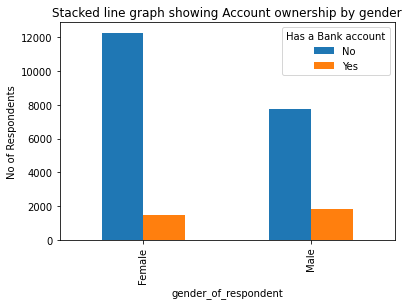

In [279]:
# Which gender has higher likelihood of owning a bank account? 
pd.crosstab(df1['gender_of_respondent'], df1['Has a Bank account']).plot(kind='bar')
plt.title("Stacked line graph showing Account ownership by gender")
plt.ylabel("No of Respondents")
plt.show()
#Financial is fairly equal between the two genders. 
#However, the gap between account owners and non-account owners is significantly high among the female. 

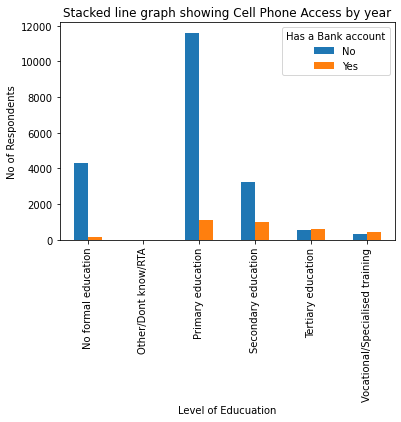

In [280]:
# Does education play a role in financial inclusion?
pd.crosstab(df1['Level of Educuation'], df1['Has a Bank account']).plot(kind='bar')
plt.title("Stacked line graph showing Cell Phone Access by year")
plt.ylabel("No of Respondents")
plt.show()
# Comparatively, the gap between account owners and non-account owners reduces significantly with increase in level of education. 
# This hints to the fact that uptake of accounts increases with increase in level of education. 
# This is evident in tertiary and Vocational/Specialized Level of education 
# where account number of account owners is higher than non-account owners  

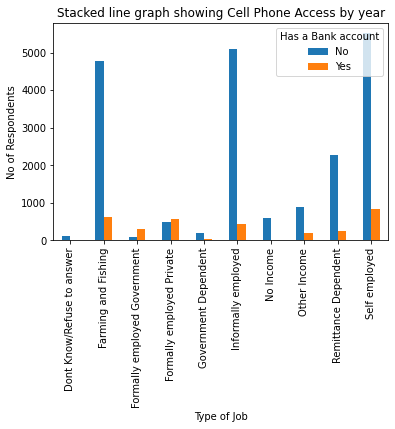

In [281]:
# Which type of job is more likely to own a bank account? 
pd.crosstab(df1['Type of Job'], df1['Has a Bank account']).plot(kind='bar')
plt.title("Stacked line graph showing Cell Phone Access by year")
plt.ylabel("No of Respondents")
plt.show()
# From the analysis, formally employed (both government and private) are most likely to own a bank account. 
# This is attributed to the fact that salaries are always paid via bank accounts. 
# Other than the formally employed group, 
# the self employed, farming & fishing and informally employed job groups are among top bank account owners.  

#Recommendations Towards Improving Financial Inclusion

From the above analyses and insights, a number of recommendations can be drawn;
* There is need for heightened financial literacy across all the countries. Such financial literacy messages and information can be disseminated through cell phones whose access is significantly high across the countries. 
* With high phone access in the region, there is need for the financial institutions to fully digitize banking services such as account opening, saving, credit services among other financial services.
* When coming up with financial products and services, it is imperative to take into keen consideration factors such as family size, job type and level of education as they evidently play a key role in shaping financial inclusion. 



##**PART 2: HYPOTHESIS TESTING**

# **Defining the Question**


# a) Hypothesis Testing
**Null hypothesis (H0):** 
* The average number of blue cars taken is not different that of the blue 
cars returned?

**Alternative hypothesis (H1):**  
* The average number of blue cars taken is different that of the blue cars returned(**CLAIM:**)

# **Reading the data**

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [283]:
df=pd.read_csv('https://bit.ly/DSCoreAutolibDataset')
# Checking the head data
df.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [284]:
# checking the bottom data
df.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [286]:
# checking the shape of the dataset
df.shape

(16085, 13)

In [287]:
df['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

# **Data Cleaning**

In [288]:
df.isnull().sum()
# our data has no missing values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [289]:
df.duplicated().sum()
# our dataset also has no duplicated values


0

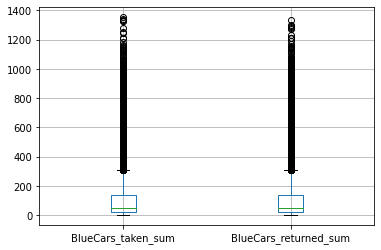

In [290]:
df.boxplot(['BlueCars_taken_sum','BlueCars_returned_sum'])

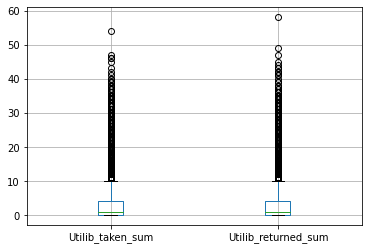

In [291]:

df.boxplot(['Utilib_taken_sum','Utilib_returned_sum'])

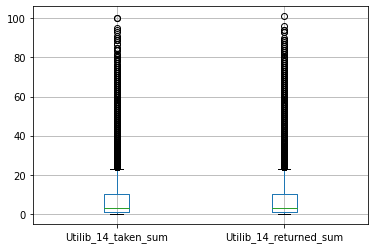

In [292]:
df.boxplot(['Utilib_14_taken_sum','Utilib_14_returned_sum'])

In [293]:
df=df.astype({'Postal code':'str','dayOfWeek':'str'})

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  object
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  object
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.6+ MB


# **Exploratory Analysis**

In [295]:
df.describe()

,n_daily_data_points,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,1431.330619,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,33.212050,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1439.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1440.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,1440.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,1440.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


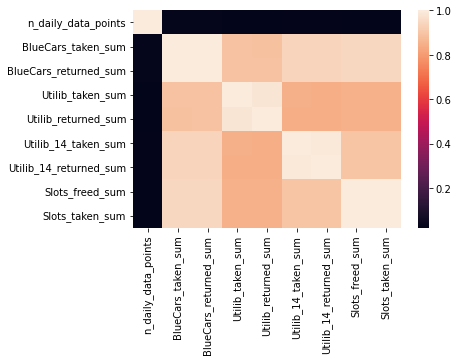

In [296]:
#correlation heatmap for the data 
sns.heatmap(df.corr())
#The heatmap shows that columns are highly correlated

(array([1.2077e+04, 1.4740e+03, 9.9900e+02, 7.6700e+02, 2.8800e+02,
        2.7600e+02, 1.2700e+02, 5.0000e+01, 1.9000e+01, 8.0000e+00]),
 array([   0. ,  135.2,  270.4,  405.6,  540.8,  676. ,  811.2,  946.4,
        1081.6, 1216.8, 1352. ]),
 <a list of 10 Patch objects>)

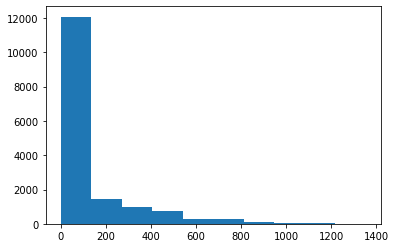

In [297]:
#checking for the normality
plt.hist(df['BlueCars_taken_sum'])
# From the plot below we can establish that the data is skewed to the Right 

In [298]:
df1=df.drop(['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum'],axis=1)

In [299]:
df1.describe()

,n_daily_data_points,BlueCars_taken_sum,BlueCars_returned_sum
count,16085.000000,16085.000000,16085.000000
mean,1431.330619,125.926951,125.912714
std,33.212050,185.426579,185.501535
min,1174.000000,0.000000,0.000000
25%,1439.000000,20.000000,20.000000
50%,1440.000000,46.000000,46.000000
75%,1440.000000,135.000000,135.000000
max,1440.000000,1352.000000,1332.000000


# Sampling

In [300]:
#Taking a sample using simple random sampling
df2 = df1.groupby('BlueCars_taken_sum', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df2

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
12654,93600,6/19/2018,1370,1,weekday,0,2
9342,92420,6/19/2018,1370,1,weekday,0,1
13186,94100,3/8/2018,1439,3,weekday,0,2
15304,94500,6/19/2018,1370,1,weekday,0,0
11980,93390,1/31/2018,1440,2,weekday,0,3
...,...,...,...,...,...,...,...
2943,75019,5/30/2018,1440,2,weekday,525,515
1675,75011,4/29/2018,1440,6,weekend,536,548
2053,75014,1/26/2018,1437,4,weekday,555,552
2160,75014,5/27/2018,1440,6,weekend,616,632


In [301]:
df2.shape

(1533, 7)

<function matplotlib.pyplot.show>

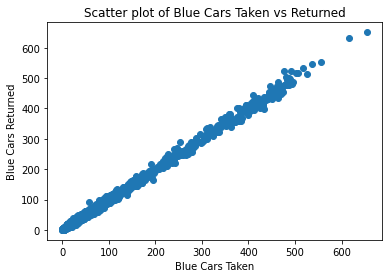

In [302]:
plt.scatter(df2['BlueCars_taken_sum'],df2['BlueCars_returned_sum'])
plt.ylabel("Blue Cars Returned")
plt.xlabel("Blue Cars Taken")
plt.title("Scatter plot of Blue Cars Taken vs Returned")
plt.show
#There is a strong linear correlation between Blue Cars Taken and Blue Cars returned

In [303]:
from scipy import stats
from scipy.stats import norm

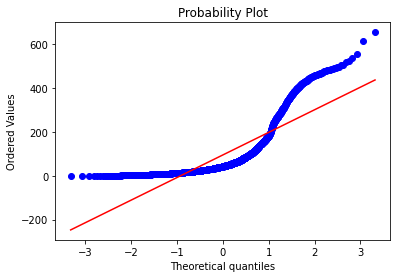

In [304]:
res = stats.probplot(df2['BlueCars_taken_sum'],plot=plt)
#The probability plot indicates that the data is linear 

In [307]:
#calculating the Z_score
df_zscore= (df2['BlueCars_taken_sum'].mean()-df2['BlueCars_taken_sum'].mean())/df2['BlueCars_taken_sum'].std()
df_zscore

0.0

In [308]:
from scipy.stats import norm
p_value= norm.cdf(df_zscore)
p_value

0.5

## **CONCLUSION**
We fail to reject the null hypothesis becase there is not sufficient evidence to prove that the average means of the bluecars taken and returned are not equal.